The Dataset
start with the dataset then do the modeling


# Commuting Stress




![Gridlock](img/gridlock.jpg)


## Simulate commuting stress

Summarise the paper by Tony Cassidy (Cassidy, 2018)



## Why simulate data?

### What is data simulation

Data simulation typically involves generating pseudo random numbers. It is often used in stochastic modeling where some event changes over time. Simulating data is used in many areas; it is used in life sciences, quality control, measuring response rates of customer services, financial and investment modeling and many other areas.  There are several compelling reasons for simulating data. 

#### known paramaters
In a simulated model, the values of the underlying parameters are known. This allows a comparison to be made with the real world dataset it purports to model. 

#### tweak parameters
Simulating data allows for the parameters to be fine tuned. Parameters may influence each other and performing small adjustments to one parameter can help identify its affect on other inputs such as in sensitivity analysis. In real world situations it may be impossible to control the environment to such an extent that such fine tuned adjustments can be made. 

#### Sample errors
There is a natural variation in data measurements. Collecting one set of flower samples to measure their petal widths may differ when collected another time. Asking one set of questions on a survey may produce different answers when asked at another time. There is a natural variation in measurements. The variation in sampling data is a measure of statistical precision. Running data simulations is a valuable way of seeing the effect of randomness on natural processes.    

#### Check things are working correctly
Data simulations are useful to check that real world systems are on target or working as expected. A model can be run several times with different parameters or sample sizes and the means or other estimator can be calculated and compared to the real world system. 

#### Check statistical power
Is there an actual relationship between input values and outputs values? Statistical power is a measure of finding an effect on the data when it exists. It is linked to the sample size used to model the phenomenon in question. Data simulation allows variation in sample size so that statistical power can be analysed. 

#### Check parameter identification
Are the right parameters used? Would a different parameter fit the model better? Data simulation allows for various 'runs' to be conducted with varying parameters. Results can then be checked for clusters and signs that the parameter is indeed a parameter (or not). 

#### Check estimator strength
Data simulations produce estimators which can then be checked for robustness. If the model does not predict an effect measured by the estimator but the real world data shows such an effect then there is an assumption violation. Simulations help identify this by limiting certain parameters to test out specific ones. This allows the strength of the estimator or the strength of underlying biases to be measured. 

#### Develops understanding of real world phenomena
If an analyst can model the real world phenomena in question then they have abstracted its core features, modeled it and recreated the item investigated. This aids their understanding of this phenomenon. 
references for this came from (Kéry & Royle, 2016)

### Stochastic modeling
Stochastic modeling is a type of mathematical modeling that uses random processes and probability distributions to model some data that can change with time. It is often applied to financial modeling in investments or population modeling in life sciences(Wikipedia contributors, 2018 September 17). 


## Chose a real world phenomenon
The topic chosen for this project is commuting factors and its impact on stress levels. 

### Why this topic?
This topic was chosen as I previously commuted several hours per day for both college and work, and currently have family members that make long commutes daily. 


## Commuting and Stress
Modern life is stressful. In pre history times people experienced stress; Finding food safety and shelter without getting killed takes a toll. Modern stress is for the most part less focused than ancient times. Being harder to pin down and identify produces a more chronic type of stress, an ongoing malaise.  more diffused and persistent. Hassard *et al* (2014) noted that the cost of work related stress in the EU was estimated at 20 billion in 2002. Cassidy 1992 noted that the UK's gross national product is down 10 percent every year due to stress and its consequences. There are many factors contributing to stress. This report looks at ones of these, the daily commute. Central Statistics Office (2017) puts the number of people (workers and students) commuting in Ireland at almost 3 million, with a steady rise in the number of people commuting to work. What effect does this daily routine have on the psychological and physical health of the population? Costa *et al* as cited in Cassidy (1992) noted that within the European Union, commuters and distance traveled have increased but the duration of the commute has decreased. This has knock on implications with the number of accidents as well as impact on the home and work life of the people involved. 

Cassidy 1992 noted that while commuting itself is stressful it also compounds stress in other domains. It can affect home life, recreational activities and increase work absenteeism. Costa et al as cited in Cassidy found public transport commuters reported a more stressed lifestyle, whereas Gulian et al as cited in Cassidy 1992 found 'road rage' stress experienced by people who drive to work. Schaeffer et al as cited in Cassidy found that stress levels were mitigated by the level of control the commuter had on their journey. Cassidy 1992 conducted a study of 370 participants who commute to work. He collected information via a questionnaire on measures such as daily commute distance and duration, time spent commuting and any impedance which was defined as the average miles per hour the commute took. In addition he also collected information on transportation used, biographical information such as age, sex, marital status, eduction, occupation, length of time in current job, information on home, commuting, work, leisure and personal satisfaction. This data is modeled in the sections below.


## Model and synthesise the data

### import libraries

In [24]:
# for rendering plots in jupyter notebook
%matplotlib inline 
# pandas for the dataframe
import pandas as pd 
# numpy for array minimpuation and random number generation
import numpy as np
# matplotlib for plots
import matplotlib.pyplot as plt 

import collections # for groupings
from collections import Counter # for groupings

Create the number of rows needed for the dataset. 

In [2]:
# Set the index
x = range(0, 370)
print(len(x))

370


Create the database headings. 

In [3]:
df = pd.DataFrame(columns = ['Gender','Distance', 'Duration', 'Time', 'Impedance', 'Transport'], index = x)
# check headers are present
df.head()

,Gender,Distance,Duration,Time,Impedance,Transport
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
size = 370
print("The size of the dataset is: ", size)

The size of the dataset is:  370


## The variables

There are four key variables that are expected to show a relationship between stress and commuting. These are
* Distance
* Duration
* Time 
* Impedance

Distance is the distance commuted. This was measured in miles. There were four categories that participants could select to classify their distance commuted. These were 0.5 miles, between 6 and 15 miles, 16 to 30 miles and over 30 miles. The majority of commuters surveyed were 15 or under miles away from their work. 


Duration of commute was the typical time taken to make the journey to work. This was categorised into three bands, between 0 and 30 minutes, between 30 and 60 minutes and over 60 minutes. The majority of participants reported their duration of commute at under 60 minutes. 


The time period participants spent  as a commuter was also measured. There were four categories that participants could classify their time into. These were between 1 and 29 months, 30 to 60 months, 60 to 131 months and over 132 months.

The impedance of the commute was also measured. This was defined as the average miles per housre of the commute. This was classified into three bands, upto 17 miles per hour mph, 17.3-30 mph and over 30 mph. 

In addition, other variables were collected

* Transport
* Age
* Gender

The transport was either car or public transport. Age and sex/gender information was also collected. 
There were a number of measures of stress collected over various domains of the participants life including

* Home domain - perceived stress and financial stress, social support levels, time at home, use of home life to ameliorate work stress. 
* Commuting domain - perceived commuting stress and mood.  
* Work domain - perceived stress, sources of work stress and commitment to work
* Leisure domain - approach to leisure time including time spent exercising, socialising and perceived fitness.
* Personal domain - problem solving ability and internal/external attribution of events, levels of situational control, motivation and confidence. In addition, levels of satisfaction with life and general perceived stress  were measured. 

## Model the data

### Gender
Add the gender data. 
This is simulated with np.random.choice
#### Why?

To simplify, assume two genders based on biological sex. There are approximately equal ratios of males to females (Wikipedia contributors, 2018 November 23). The probability p should be equally weighted for both. In Cassidy's study he surveyed 217 males and 153 females with the total number of participants at 370. choice is used to model the Gender field but it could also be modeled by a Bernoulli distribution i.e. Binomial with n = 1 with p being the probability of being one of either male or female (male in this case). 


In [5]:
temp_gen = np.random.binomial(1, 217/size, size)
temp_gen

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,

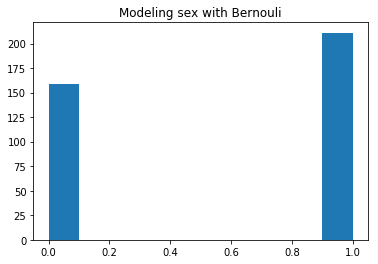

In [6]:
plt.title('Modeling sex with Bernouli')
plt.hist(temp_gen)
plt.show()

The 1's would have to be changed to Male and the 0's to Female. This distribution was not used as Male and Female are categorical data. This refers to data that takes a fixed set of values, in this case male or female. Categorical data can be stored as text or as a number that maps to the category. The gender categories are also nominal in that there is no order preferences, female, male or male, female conveys the same information. There is no inherent order so a numerical distribution such as Bernoulli was rejected. NumPy Random's choice offered a way of modeling the 'Gender' column. A 'gender' array was created containing the 'Gender' category values, 'Male' and 'Female'. As Cassidy's investigation contained 370 participants, the size was specified as 370. Cassidy did not pole an equal proportion of males and females and this was reflected in the choices for p, 217 males from a population of 370 and 153 females from a population of 370 participants were surveyed. 

[ref](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)

[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.choice.html#numpy.random.choice)

[ref](https://www.datacamp.com/community/tutorials/categorical-data)

In [7]:
gender = ['Male', 'Female']
y_gen = np.random.choice(gender, size, p=[217/size, 153/size])


This is in array form which will be changed to dataframe form. 

In [8]:
df['Gender'] = pd.Series(y_gen)
df.head()

,Gender,Distance,Duration,Time,Impedance,Transport
0,Female,NaN,NaN,NaN,NaN,NaN
1,Male,NaN,NaN,NaN,NaN,NaN
2,Male,NaN,NaN,NaN,NaN,NaN
3,Male,NaN,NaN,NaN,NaN,NaN
4,Male,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,Gender,Distance,Duration,Time,Impedance,Transport
365,Female,NaN,NaN,NaN,NaN,NaN
366,Female,NaN,NaN,NaN,NaN,NaN
367,Male,NaN,NaN,NaN,NaN,NaN
368,Male,NaN,NaN,NaN,NaN,NaN
369,Female,NaN,NaN,NaN,NaN,NaN


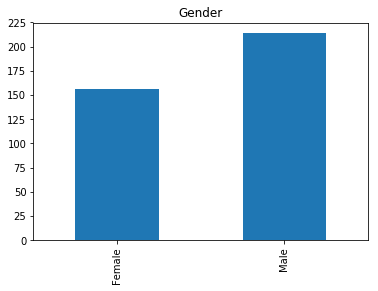

In [34]:
# calculate the number of males and females
gen_counts = Counter(df['Gender'])
# create an indexed dataframe with the number of counts
df_gen = pd.DataFrame.from_dict(gen_counts, orient='index')
                               
# plot the bar chart of the gender counts
df_gen.plot(kind='bar', title='Gender', legend = False)
plt.show()



### Distance
Add the distance data. 
This is simulated with np.random.choice
#### Why?
NumPy Random's choice was used to simulate the distances. There are four bands, the data is ordinal, as there is a progression from 0.5 miles to 30 plus miles. However as these choices were items on a survey 'choice' function would be suitable as a model. There was a total of 346 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the distance bands. A 'Distance' array was created containing the four distance bands, 0.5 miles, 6-15 miles, 16-30 miles, over 30 miles. There were 109 response in the first band so this was weighted as 109/346, 114 for the second band giving a probability of 114/346, 67 responses for the 16-30 mile response giving a weighting of 67/346 and lastly 56 responses for the over 30 mile distance giving a weighting of 56/346.  The model of the Distance variable can be found below.


In [42]:
# set up the survey Distance categories
distance = ['0.5 miles', '6-15 miles', '16-30 miles', 'over 30 miles']
# calculate the total number of responders to this question
tot_dist = 109+144+67+56
# generate the response with 'choice' function
y_dist = np.random.choice(distance, size, p=[109/tot_dist, 144/tot_dist, 67/tot_dist, 56/tot_dist])


Change the y_dist distance array to a dataframe and add it to the simulated model. 

In [43]:
df['Distance'] = pd.Series(y_dist)
df.head()

,Gender,Distance,Duration,Time,Impedance,Transport
0,Female,16-30 miles,NaN,NaN,NaN,NaN
1,Male,6-15 miles,NaN,NaN,NaN,NaN
2,Male,over 30 miles,NaN,NaN,NaN,NaN
3,Male,6-15 miles,NaN,NaN,NaN,NaN
4,Male,0.5 miles,NaN,NaN,NaN,NaN


In [44]:
df.tail()

,Gender,Distance,Duration,Time,Impedance,Transport
365,Female,16-30 miles,NaN,NaN,NaN,NaN
366,Female,16-30 miles,NaN,NaN,NaN,NaN
367,Male,6-15 miles,NaN,NaN,NaN,NaN
368,Male,over 30 miles,NaN,NaN,NaN,NaN
369,Female,6-15 miles,NaN,NaN,NaN,NaN


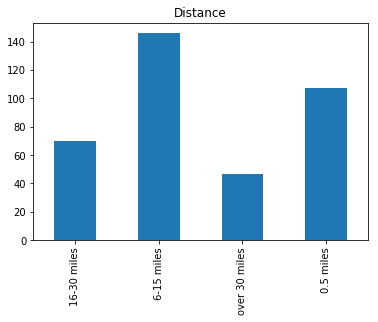

In [45]:
# calculate the number of responses to each distance band
dist_counts = Counter(df['Distance'])
# create an indexed dataframe with the number of counts
df_dist = pd.DataFrame.from_dict(dist_counts, orient='index')
                      
#plot the bar chart of the distance counts
df_dist.plot(kind='bar', title='Distance', legend = False)
plt.show()

### Duration
Add the duration data. 
This is simulated with np.random.choice
#### Why?
NumPy Random's choice was used to simulate the duration of commute. There are three bands and the data is ordinal, as there is a progression from 30 minutes to over 60 minutes. However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 355 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the duration bands. A 'Duration' array was created containing the three duration bands, 0 to 30 minutes, 30- 60 minutes and over 60 minutes. There were 137 responses in the first band so this was weighted as 137/355, 121 for the second band giving a probability of 121/355 and 97 responses for the Over 60 minutes response giving a weighting of 97/355.  The model of the Duration variable can be found below.


In [47]:
# add the duration categories
duration = ['0-30 minutes', '30-60 minutes', 'Over 60 minutes']
# calculate the total number of responses to this question
tot_dur = 137+121+97
# generate the responses to the 'Duration' category
y_dur = np.random.choice(duration, size, p=[137/tot_dur, 121/tot_dur, 97/tot_dur])

Change the y_dur duration array to a dataframe and add it to the simulated model. 

In [48]:
df['Duration'] = pd.Series(y_dur)
df.head()

,Gender,Distance,Duration,Time,Impedance,Transport
0,Female,16-30 miles,Over 60 minutes,NaN,NaN,NaN
1,Male,6-15 miles,0-30 minutes,NaN,NaN,NaN
2,Male,over 30 miles,0-30 minutes,NaN,NaN,NaN
3,Male,6-15 miles,30-60 minutes,NaN,NaN,NaN
4,Male,0.5 miles,Over 60 minutes,NaN,NaN,NaN


In [ ]:
df.tail()

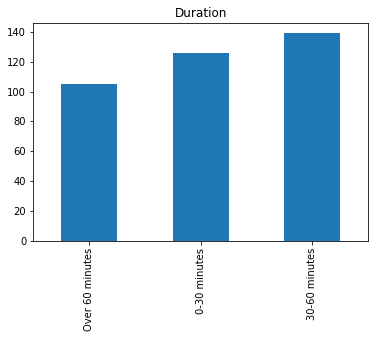

In [49]:
# calculate the number of responses to each duration band
dur_counts = Counter(df['Duration'])
# create an indexed dataframe with the number of counts
df_dur = pd.DataFrame.from_dict(dur_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_dur.plot(kind='bar', title='Duration', legend = False)
plt.show()

### Time
Add the time data. 
This is simulated with np.random.choice
#### Why?
NumPy Random's choice was used to simulate the time spent commuting. There are four bands in this category. Again the data is ordinal, as there is a progression from 1 month to over 132 months.However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 343 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the time bands. A 'Time' array was created containing the four time bands, 1 - 29 months, 30-60 months, 60-131 months and over 132 months. There were 73 responses in the first band so this was weighted as 73/343, 99 for the second band giving a probability of 99/343; 80 responses for the third band giving a weighting of 80/343 and finally 91 responses in the Over 132 month band giving a weighting of 91/343.   The model of the Time variable can be found below.

In [50]:
# add the  time category bands
time = ['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']
# calculate the number of responses to the Time category question
tot_time = 73+99+80+91
# generate the time category responses with their respective weightings
y_time = np.random.choice(time, size, p=[73/tot_time, 99/tot_time, 80/tot_time, 91/tot_time])

Change the y_time time array to a dataframe and add it to the simulated model. 

In [51]:
df['Time'] = pd.Series(y_time)
df.head()

,Gender,Distance,Duration,Time,Impedance,Transport
0,Female,16-30 miles,Over 60 minutes,60-131 months,NaN,NaN
1,Male,6-15 miles,0-30 minutes,Over 132 months,NaN,NaN
2,Male,over 30 miles,0-30 minutes,30-60 months,NaN,NaN
3,Male,6-15 miles,30-60 minutes,Over 132 months,NaN,NaN
4,Male,0.5 miles,Over 60 minutes,30-60 months,NaN,NaN


In [ ]:
df.tail()

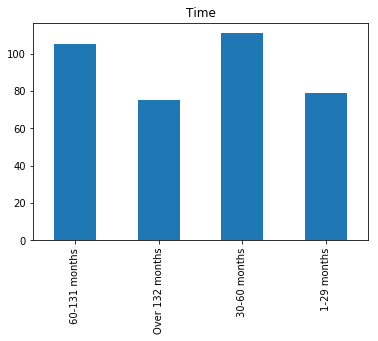

In [54]:
# calculate the number of responses to each duration band
time_counts = Counter(df['Time'])
# create an indexed dataframe with the number of counts
df_time = pd.DataFrame.from_dict(time_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_time.plot(kind='bar', title='Time', legend = False)
plt.show()

### Impedance
Add the impedance data. 
This is simulated with np.random.choice
#### Why?
NumPy Random's choice was used to simulate the time spent commuting. There are three bands in this category, 17 mph or less, 17.3 - 30 mph and Over 30 mph. Again the data is ordinal, as there is a progression from 17 mph to over 30 mph. However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 370 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the time bands (which in this case was the number of people surveyed). An 'Impedance' array was created containing the three impedance bands. There were 207 responses in the first band so this was weighted as 207/370, 97 for the second band giving a probability of 97/370; 66 responses for the third band giving a weighting of 66/370. The model of the Impedance variable can be found below.

In [55]:
# create the impedance bands
impedance = ['17 mph or less', '17.3-30 mph', 'Over 30 mph']
# calculate the number of responses to the impedance question
tot_imp = 207+97+66
# generate responses to the impedence question
y_imp = np.random.choice(impedance, size, p=[207/tot_imp, 97/tot_imp, 66/tot_imp])


Change the y_imp impedance array to a dataframe and add it to the simulated model. 

In [56]:
df['Impedance'] = pd.Series(y_imp)
df.head()

,Gender,Distance,Duration,Time,Impedance,Transport
0,Female,16-30 miles,Over 60 minutes,60-131 months,17.3-30 mph,NaN
1,Male,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,NaN
2,Male,over 30 miles,0-30 minutes,30-60 months,17.3-30 mph,NaN
3,Male,6-15 miles,30-60 minutes,Over 132 months,17 mph or less,NaN
4,Male,0.5 miles,Over 60 minutes,30-60 months,17 mph or less,NaN


In [ ]:
df.tail()

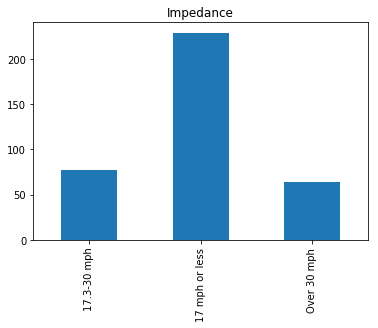

In [58]:
# calculate the number of responses to each impedance band
imp_counts = Counter(df['Impedance'])
# create an indexed dataframe with the number of counts
df_imp = pd.DataFrame.from_dict(imp_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_imp.plot(kind='bar', title='Impedance', legend = False)
plt.show()

### Other variables
The model also contained other information. 

### Transport
The method of transportation data could be car or public transport. This is simulated with np.random.choice

#### Why?
NumPy Random's choice was used to simulate the mode of transportation. There are two bands in this category, car or public transport. Like gender the data is nominal However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 313 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the transport bands. A 'Transport' array was created containing the two transport bands, car and public transport. There were 124 responses in the first band so this was weighted as 124/313 and 189 responses for the public transport band giving a probability of 189/313. The model of the Transport variable can be found below.

In [60]:
# create the Transport response bands  
transport = ['Car', 'Public transport']
# calculate the number of responses
tot_tran = 124+189
# generate the transport response array
y_tran = np.random.choice(transport, size, p= [124/tot_tran, 189/tot_tran])


Change the y_tran transportation array to a dataframe and add it to the simulated model. 

In [61]:
df['Transport'] = pd.Series(y_tran)
df.head()

,Gender,Distance,Duration,Time,Impedance,Transport
0,Female,16-30 miles,Over 60 minutes,60-131 months,17.3-30 mph,Public transport
1,Male,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,Public transport
2,Male,over 30 miles,0-30 minutes,30-60 months,17.3-30 mph,Car
3,Male,6-15 miles,30-60 minutes,Over 132 months,17 mph or less,Car
4,Male,0.5 miles,Over 60 minutes,30-60 months,17 mph or less,Car


In [62]:
df.tail()

,Gender,Distance,Duration,Time,Impedance,Transport
365,Female,16-30 miles,Over 60 minutes,30-60 months,17 mph or less,Public transport
366,Female,16-30 miles,30-60 minutes,60-131 months,17 mph or less,Car
367,Male,6-15 miles,30-60 minutes,60-131 months,17 mph or less,Public transport
368,Male,over 30 miles,0-30 minutes,30-60 months,17 mph or less,Car
369,Female,6-15 miles,30-60 minutes,1-29 months,17 mph or less,Public transport


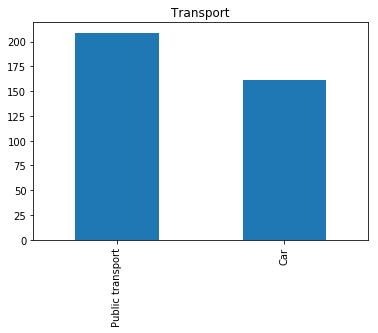

In [63]:
# calculate the number of responses to each impedance band
tran_counts = Counter(df['Transport'])
# create an indexed dataframe with the number of counts
df_tran = pd.DataFrame.from_dict(tran_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_tran.plot(kind='bar', title='Transport', legend = False)
plt.show()

### Age
No information was given in the report on the age range of participants. As the time commuting bvariable was up to 132 months or 11 years I assumed that the age range minimum was 11 years plus the assumed school leaving age of 18 i.e. 29 years and the maximum age was the then retirement age of 65. Age composition takes a pyramid structure with a greater number of people in the younger age bands than in the older ones [ref](https://www.ssc.wisc.edu/~walker/wp/wp-content/uploads/2012/01/E623PopDividend.pdf)


![Age pyramid](img/1992%20age%20pyramid.JPG)

The above distribution looks to be roughly uniform till about age 45 and then triangular from age 45 to 90. [](graph taken from https://g.redditmedia.com/xlCvXoGuPg8PujIhXwsZl4WTWTZwVDh59LToqY_I2HY.gif?fm=mp4&mp4-fragmented=false&s=aeaa3dc089e147917831677d8ee15699

No single NumPy Random function models this distribution but it could be modeled by a combination of uniform and triangular distribution functions. 
Assumptions
* Assume the questionnaire data came from the year the report was written i.e. 1992. 
* Assume this image is correct as a model of the 1992 populations
* Assume that male and female population distribution are the same
* Assume population is uniformly distributed up to age 45 and triangularly distributed from 45 years onwards

In [96]:
# code adapted from https://stackoverflow.com/questions/36537811/numpy-trapezoidal-distribution-for-age-distribution

# model the distribution of the Age pyramid assume Male and Female are similarly distributed

def agedistro(turn,end,size):
    pass
    totarea = turn + (end-turn)/2  # e.g. 45 + (90-45)/2 turn is when distrubution shape switches
    areauptoturn = turn             # say 45
    areasloped = (end-turn)/2     # (90-45)/2
    size1= int(size*areauptoturn/totarea)
    size2= size- size1 
    s1 = np.random.uniform(low=29,high=turn,size= size1)  # school age plus 11 years commuting is 29
    s2 = np.random.triangular(left=turn,mode=turn,right=end,size=size2) #(left, mode, right, size=None)
            # mode : scalar-  the value where the peak of the distribution occurs. 
            #The value should fulfill the condition left <= mode <= right.
    s3= np.concatenate((s1,s2)) # don't use add , it will add the numbers piecewise
    return s3

s3=agedistro(turn=45,end=65,size=size).astype(int)   # in 1992 data appears roughly uniform till 45, and still working so under retirement age
y_age = np.random.choice(s3, size) # ages come from this distribution
df['Age'] = pd.Series(y_age)
df.head()
 

,Gender,Distance,Duration,Time,Impedance,Transport,Age
0,Female,16-30 miles,Over 60 minutes,60-131 months,17.3-30 mph,Public transport,31
1,Male,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,Public transport,30
2,Male,over 30 miles,0-30 minutes,30-60 months,17.3-30 mph,Car,30
3,Male,6-15 miles,30-60 minutes,Over 132 months,17 mph or less,Car,34
4,Male,0.5 miles,Over 60 minutes,30-60 months,17 mph or less,Car,36


In [97]:
df.tail()

,Gender,Distance,Duration,Time,Impedance,Transport,Age
365,Female,16-30 miles,Over 60 minutes,30-60 months,17 mph or less,Public transport,32
366,Female,16-30 miles,30-60 minutes,60-131 months,17 mph or less,Car,30
367,Male,6-15 miles,30-60 minutes,60-131 months,17 mph or less,Public transport,38
368,Male,over 30 miles,0-30 minutes,30-60 months,17 mph or less,Car,41
369,Female,6-15 miles,30-60 minutes,1-29 months,17 mph or less,Public transport,44


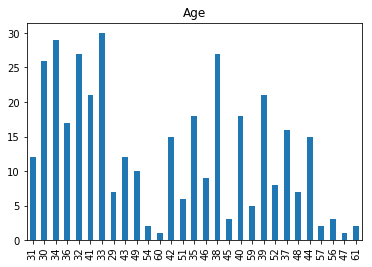

In [98]:
# calculate the ages of the participants 
age_counts = Counter(df['Age'])
# create an indexed dataframe with the number of counts
df_age = pd.DataFrame.from_dict(age_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_age.plot(kind='bar', title='Age', legend = False)
plt.show()

### Domain data
There are five domains that stress is measured on, home, commute, work, leisure and personal. There was no numerical data given on these measures but three bar charts illustrated the report graphs with data from these domains. The y axis for each figure was 'score' ranging from 0 to 50. 

Figure 3 had scores from 0 to 40 on the y axis and three bar charts for each of the labels positive travel mood, negative travel mood, time spent at home, frequency  of exercise and intention to continue commuting. 




In [105]:
df_hd = pd.DataFrame(columns = ['Perceived home stress','Social support', 'Time at home', 'Home as stress control', 'Perceived financial stress'], index = x)
# check headers are present
df_hd.head()

,Perceived home stress,Social support,Time at home,Home as stress control,Perceived financial stress
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


There is no information in the report as to the scoring scheme of these measures. Assume 'perceived home stress', 'social support' and 'perceived financial stress' are measured on three bands, low, medium and high

In [107]:
df_cd = pd.DataFrame(columns = ['Perceived commute stress','Commute Mood '], index = x)
# check headers are present
df_cd.head()

,Perceived commute stress,Commute Mood
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [108]:
df_wd = pd.DataFrame(columns = ['Perceived work stress','Job commitment', 'Source of work stress'], index = x)
# check headers are present
df_wd.head()

,Perceived work stress,Job commitment,Source of work stress
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [109]:
df_ld = pd.DataFrame(columns = ['Attitude to Leisure time','Experience of Leisure time', 'Exercise frequency', 'Time socializing', 'Perceived fitness'], index = x)
# check headers are present
df_ld.head()

,Attitude to Leisure time,Experience of Leisure time,Exercise frequency,Time socializing,Perceived fitness
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [103]:
df_pd = pd.DataFrame(columns = ['Problem solving ability','Attributional style', 'hopelessness level', 'Control', 'Motivation', 'Confidence', 'Perceived stress', 'Life satisfaction'], index = x)
# check headers are present
df_pd.head()

,Problem solving ability,Attributional style,hopelessness level,Control,Motivation,Confidence,Perceived stress,Life satisfaction
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
domains = [df_hd, df_cd, df_wd, df_ld, df_pd]

df_d = pd.concat(domains, sort=False)
df_d

,Perceived home stress,Social support,Time at home,Home as stress control,Perceived financial stress,Perceived commute stress,Commute Mood,Perceived work stress,Job commitment,Source of work stress,...,Time socializing,Perceived fitness,Problem solving ability,Attributional style,hopelessness level,Control,Motivation,Confidence,Perceived stress,Life satisfaction
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 The full data is below along with the information and description of it.                      


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.nunique()

## References



Cassidy, T. (2018). Commuting‐related Stress: Consequences and Implications. Retrieved from https://www.researchgate.net/profile/AnthonyTony_Cassidy/publication/235250379_Commuting-related_Stress_Consequences_and_Implications/links/574da3f608ae061b3303533c/Commuting-related-Stress-Consequences-and-Implications.pdf

Central Statistics Office. (2017, August 31). Census of Population 2016 – Profile 6 Commuting in Ireland. Retrieved November 24, 2018, from https://www.cso.ie/en/releasesandpublications/ep/p-cp6ci/p6cii/p6noc/


Hassard, J., Teoh, K., Cox, T., Dewe, P., Cosma, M., Gründler, R., . . . Van den Broek, K. (2014). Calculating the cost of work-related stress and psychosocial risks (Rep.). Luxembourg: Publications Office of the European Union. doi:10.2802/20493

Kéry, M., & Royle, J. A. (2016). Applied hierarchical modeling in ecology: Analysis of distribution, abundance and species richness in R and BUGS. Retrieved from https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation


Wikipedia contributors. (2018, September 17). Stochastic process. In Wikipedia, The Free Encyclopedia. Retrieved 11:19, November 24, 2018, from https://en.wikipedia.org/w/index.php?title=Stochastic_process&oldid=859982240

Wikipedia contributors. (2018, November 23). Human sex ratio. In Wikipedia, The Free Encyclopedia. Retrieved 13:07, November 24, 2018, from https://en.wikipedia.org/w/index.php?title=Human_sex_ratio&oldid=870236802

Hassard
